In [15]:
# 1. Setup

import cartopy.crs as ccrs
import earthaccess
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [16]:
auth = earthaccess.login(persist=True)

In [17]:
# 2. Get Level-3 Data

results = earthaccess.search_data(
    short_name="PACE_SPEXONE_L3M_MAPOL_OCEAN",
    temporal=("2024-03-06", "2024-03-06"),
    count=1,
)
paths = earthaccess.open(results)
paths

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

[<File-like object HTTPFileSystem, https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_SPEXONE.20231221_20240320.L3m.SNWI.MAPOL_OCEAN.V3_0.1deg.nc>]

In [19]:
datatree = xr.open_datatree(paths[0])
datatree

<xarray.DataTree>
Group: /
│   Dimensions:           (wavelength: 34, lat: 180, lon: 360, rgb: 3,
│                          eightbitcolor: 256)
│   Coordinates:
│     * wavelength        (wavelength) float64 272B 407.0 413.0 ... 707.0 748.0
│     * lat               (lat) float32 720B 89.5 88.5 87.5 ... -87.5 -88.5 -89.5
│     * lon               (lon) float32 1kB -179.5 -178.5 -177.5 ... 178.5 179.5
│   Dimensions without coordinates: rgb, eightbitcolor
│   Data variables: (12/25)
│       alh               (lat, lon) float32 259kB ...
│       windspeed         (lat, lon) float32 259kB ...
│       chla_mapol        (lat, lon) float32 259kB ...
│       aot               (lat, lon, wavelength) float32 9MB ...
│       ssa               (lat, lon, wavelength) float32 9MB ...
│       reff_fine         (lat, lon) float32 259kB ...
│       ...                ...
│       Rrs1_mean         (lat, lon, wavelength) float32 9MB ...
│       Rrs1_std          (lat, lon, wavelength) float32 9MB ...
│       Rrs2_mean         (lat, lon, wavelength) float32 9MB ...
│       Rrs2_std          (lat, lon, wavelength) float32 9MB ...
│       qual              (lat, lon) float32 259kB ...
│       palette           (rgb, eightbitcolor) uint8 768B ...
│   Attributes: (12/60)
│       product_name:                     PACE_SPEXONE.20231221_20240320.L3m.SNWI...
│       instrument:                       SPEXONE
│       title:                            SPEXONE Level-3 Standard Mapped Image
│       project:                          Ocean Biology Processing Group (NASA/GS...
│       platform:                         PACE
│       source:                           satellite observations from SPEXONE-PACE
│       ...                               ...
│       publisher_url:                    https://oceandata.sci.gsfc.nasa.gov
│       processing_level:                 L3 Mapped
│       cdm_data_type:                    grid
│       data_bins:                        13412
│       data_minimum:                     -0.14194722
│       data_maximum:                     14.999632
└── Group: /processing_control
    │   Attributes:
    │       software_name:     l3mapgen
    │       software_version:  2.4.0-V2025.5
    │       input_sources:     PACE_SPEXONE.20231221_20240320.L3b.SNWI.MAPOL_OCEAN.V3...
    │       l2_flag_names:     
    └── Group: /processing_control/input_parameters
            Attributes: (12/48)
                par:                PACE_SPEXONE.20231221_20240320.L3m.SNWI.MAPOL_OCEAN.V...
                suite:              MAPOL_OCEAN
                ifile:              PACE_SPEXONE.20231221_20240320.L3b.SNWI.MAPOL_OCEAN.V...
                ofile:              PACE_SPEXONE.20231221_20240320.L3m.SNWI.MAPOL_OCEAN.V...
                oformat:            2
                ofile_product_tag:  PRODUCT
                ...                 ...
                num_cache:          500
                mask_land:          no
                rgb_land:           160,82,45
                land:               $OCDATAROOT/common/landmask_GMT15ARC.nc
                full_latlon:        yes
                doi:

In [20]:
dataset = xr.merge(datatree.to_dict().values())
dataset

<xarray.Dataset> Size: 117MB
Dimensions:           (lat: 180, lon: 360, wavelength: 34, rgb: 3,
                       eightbitcolor: 256)
Coordinates:
  * wavelength        (wavelength) float64 272B 407.0 413.0 ... 707.0 748.0
  * lat               (lat) float32 720B 89.5 88.5 87.5 ... -87.5 -88.5 -89.5
  * lon               (lon) float32 1kB -179.5 -178.5 -177.5 ... 178.5 179.5
Dimensions without coordinates: rgb, eightbitcolor
Data variables: (12/25)
    alh               (lat, lon) float32 259kB ...
    windspeed         (lat, lon) float32 259kB ...
    chla_mapol        (lat, lon) float32 259kB ...
    aot               (lat, lon, wavelength) float32 9MB ...
    ssa               (lat, lon, wavelength) float32 9MB ...
    reff_fine         (lat, lon) float32 259kB ...
    ...                ...
    Rrs1_mean         (lat, lon, wavelength) float32 9MB ...
    Rrs1_std          (lat, lon, wavelength) float32 9MB ...
    Rrs2_mean         (lat, lon, wavelength) float32 9MB ...
    Rrs2_std          (lat, lon, wavelength) float32 9MB ...
    qual              (lat, lon) float32 259kB ...
    palette           (rgb, eightbitcolor) uint8 768B ...
Attributes: (12/60)
    product_name:                     PACE_SPEXONE.20231221_20240320.L3m.SNWI...
    instrument:                       SPEXONE
    title:                            SPEXONE Level-3 Standard Mapped Image
    project:                          Ocean Biology Processing Group (NASA/GS...
    platform:                         PACE
    source:                           satellite observations from SPEXONE-PACE
    ...                               ...
    publisher_url:                    https://oceandata.sci.gsfc.nasa.gov
    processing_level:                 L3 Mapped
    cdm_data_type:                    grid
    data_bins:                        13412
    data_minimum:                     -0.14194722
    data_maximum:                     14.999632

In [21]:
# 4. Visualize SPEXone L3 aerosol properties

aot = dataset["aot"].values
ssa = dataset["ssa"].values
fvf = dataset["fvf"].values
aot.shape, ssa.shape, fvf.shape

((180, 360, 34), (180, 360, 34), (180, 360))

In [23]:
lat = dataset["lat"].values
lon = dataset["lon"].values
plot_range = [lon.min(), lon.max(), lat.min(), lat.max()]
wavelength = dataset["wavelength"].values
print(wavelength)

[407. 413. 419. 425. 431. 437. 443. 449. 456. 462. 469. 476. 482. 489.
 496. 503. 510. 518. 525. 533. 540. 548. 556. 564. 572. 580. 588. 596.
 614. 631. 668. 677. 707. 748.]


In [24]:
def plot_l2_product(
    data, plot_range, label, title, vmin, vmax, figsize=(12, 4), cmap="viridis"
):
    """Make map and histogram (default)"""

    # Create a figure with two subplots: 1 for map, 1 for histogram
    fig = plt.figure(figsize=figsize)
    gs = fig.add_gridspec(1, 2, width_ratios=[3, 1], wspace=0.3)

    # Map subplot
    ax_map = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
    ax_map.set_extent(plot_range, crs=ccrs.PlateCarree())
    ax_map.coastlines(resolution="110m", color="black", linewidth=0.8)
    ax_map.gridlines(draw_labels=True)

    # Assume lon and lat are defined globally or passed in
    pm = ax_map.pcolormesh(
        lon, lat, data, vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree(), cmap=cmap
    )
    plt.colorbar(pm, ax=ax_map, orientation="vertical", pad=0.1, label=label)
    ax_map.set_title(title, fontsize=12)

    # Histogram subplot
    ax_hist = fig.add_subplot(gs[1])
    flattened_data = data[~np.isnan(data)]  # Remove NaNs for histogram
    valid_count = np.sum(~np.isnan(flattened_data))
    ax_hist.hist(
        flattened_data, bins=40, color="gray", range=[vmin, vmax], edgecolor="black"
    )
    ax_hist.set_xlabel(label)
    ax_hist.set_ylabel("Count")
    ax_hist.set_title("Histogram: N=" + str(valid_count))

    # plt.tight_layout()
    plt.show()

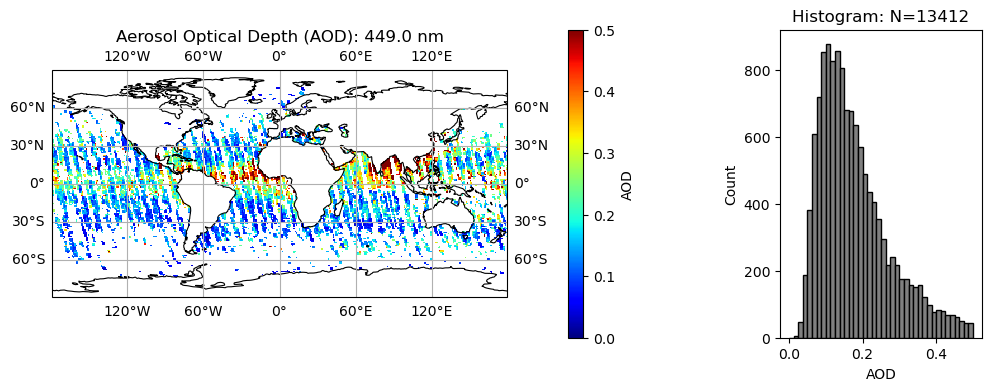

In [26]:
wavelength_index = 7
title = "Aerosol Optical Depth (AOD): " + str(wavelength[wavelength_index]) + " nm"
label = "AOD"
data = aot[:, :, wavelength_index]
plot_l2_product(
    data, plot_range=plot_range, label=label, title=title, vmin=0, vmax=0.5, cmap="jet"
)

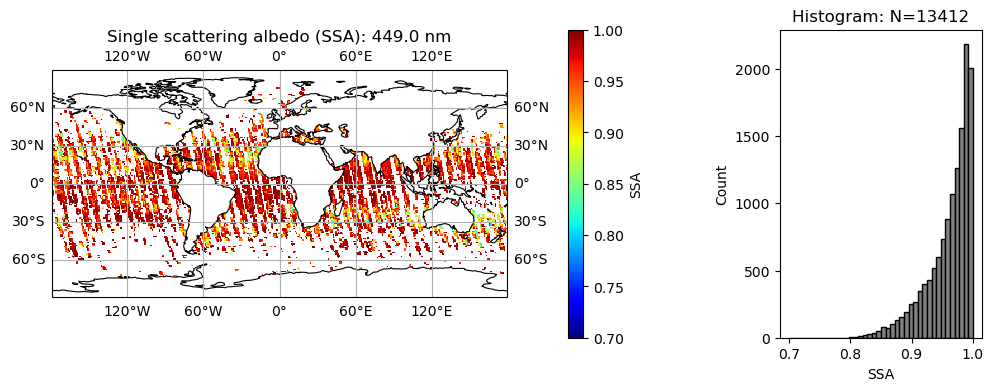

In [27]:
wavelength_index = 7
title = "Single scattering albedo (SSA): " + str(wavelength[wavelength_index]) + " nm"
label = "SSA"
data = filtered_ssa = np.where(
    aot[:, :, wavelength_index] > 0.1, ssa[:, :, wavelength_index], np.nan
)
data = ssa[:, :, wavelength_index]
plot_l2_product(
    data, plot_range=plot_range, label=label, title=title, vmin=0.7, vmax=1, cmap="jet"
)

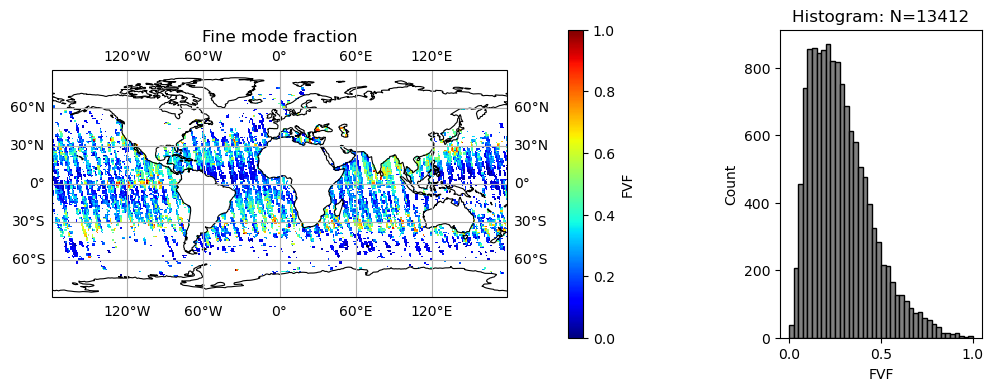

In [28]:
wavelength_index = 7
title = "Fine mode fraction"
label = "FVF"
data = fvf
plot_l2_product(
    data, plot_range=plot_range, label=label, title=title, vmin=0, vmax=1, cmap="jet"
)

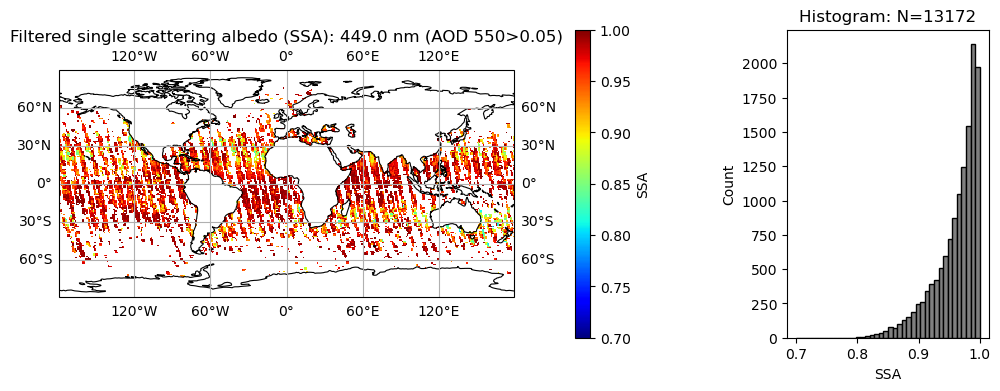

In [29]:
# 5. Improve data quality: filter low AOD pixels

wavelength_index = 7
aot_min = 0.05
title = (
    "Filtered single scattering albedo (SSA): "
    + str(wavelength[wavelength_index])
    + " nm (AOD 550>"
    + str(aot_min)
    + ")"
)
label = "SSA"
data = filtered_ssa = np.where(
    aot[:, :, wavelength_index] >= aot_min, ssa[:, :, wavelength_index], np.nan
)
plot_l2_product(
    data, plot_range=plot_range, label=label, title=title, vmin=0.7, vmax=1, cmap="jet"
)

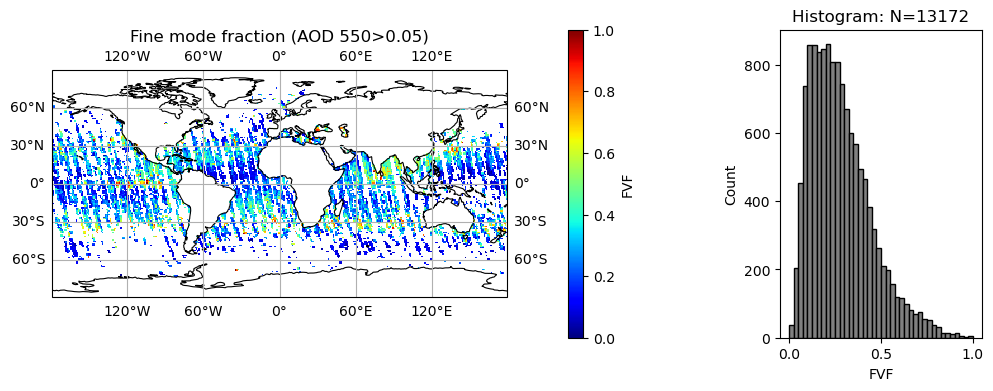

In [30]:
wavelength_index = 7
aot_min = 0.05
title = "Fine mode fraction (AOD 550>" + str(aot_min) + ")"
label = "FVF"
data = filtered_ssa = np.where(aot[:, :, wavelength_index] >= aot_min, fvf, np.nan)
plot_l2_product(
    data, plot_range=plot_range, label=label, title=title, vmin=0, vmax=1, cmap="jet"
)